Install Required Packages

In [1]:
## Importing required packages
import numpy as np
import nose
import matplotlib
import os
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import skimage.feature as feat
import sklearn.preprocessing as pre

from igor import binarywave

In [2]:
## Setting user variables for importing dataset

folder_path = 'C:/Users/Josh_/pycroscopy/'


## Importing the image data from .ibw and assigning to list dat
d = {}
dat = []
for root, dirs, files in os.walk(folder_path):
    for i, name in enumerate(files):
        d = binarywave.load(root + '/' + name)
        dat.append((d['wave']['wData']))

In [3]:
len(dat[2])

512

In [4]:
## Extracting data into observables and normalizing

height = [dat[i][:,:,0] for i in range(len(dat))]
for k in range(len(height)):
    height[k] = pre.StandardScaler().fit_transform(height[k])

amp1 = [dat[i][:,:,1] for i in range(len(dat))]
for k in range(len(height)):
    amp1[k] = pre.StandardScaler().fit_transform(amp1[k])

amp2 = [dat[i][:,:,2] for i in range(len(dat))]
for k in range(len(height)):
    amp2[k] = pre.StandardScaler().fit_transform(amp2[k])

phase1 = [dat[i][:,:,3] for i in range(len(dat))]
for k in range(len(height)):
    phase1[k] = pre.StandardScaler().fit_transform(phase1[k])

phase2 = [dat[i][:,:,4] for i in range(len(dat))]
for k in range(len(height)):
    phase2[k] = pre.StandardScaler().fit_transform(phase2[k])


In [5]:
## Registering data via translation from the regist data set

regist = height[0]

translation =[feat.register_translation((regist),(height[i]))[0] for i in range(len(height))]

for k in range(len(height)):
    height[k] = np.roll(height[k], (int(translation[k][0]),int(translation[k][1])), (0,1))
    amp1[k] = np.roll(amp1[k], (int(translation[k][0]),int(translation[k][1])), (0,1))
    amp2[k] =np.roll(amp2[k], (int(translation[k][0]),int(translation[k][1])), (0,1))
    phase1[k] = np.roll(phase1[k], (int(translation[k][0]),int(translation[k][1])), (0,1))
    phase2[k] = np.roll(phase2[k], (int(translation[k][0]),int(translation[k][1])), (0,1))

In [6]:
## Moving the array by the maximum positive or negative translations
translation_np = np.array(translation)
type(translation_np)
pos = np.max(translation_np, axis = 0)
neg = np.min(translation_np, axis = 0)

chop = [0,0]
for i in range(2):
    
    if abs(pos[i]) > abs(neg[i]):
        chop[i] = int(pos[i])
    else:
        chop[i] = int(neg[i])

        dat = [height, amp1, amp2, phase1, phase2]

for i in range(len(height)):
    for k in range(4):
        if chop[0] >= 0 and chop[1] >= 0:
            dat[k][i] = dat[k][i][(chop[0]):,(chop[1]):]
        
        elif chop[0] >= 0 and chop[1] < 0:
            dat[k][i] = dat[k][i][(chop[0]):,:(chop[1])]
        
        elif chop[0] < 0 and chop[1] >= 0:
            dat[k][i] = dat[k][i][:(chop[0]),(chop[1]):]
        
        else:
            dat[k][i] = dat[k][i][:(chop[0]),:(chop[1])]

height = dat[0]
amp1 = dat[1]
amp2 = dat[2]
phase1 = dat[3]
phase2 = dat[4]

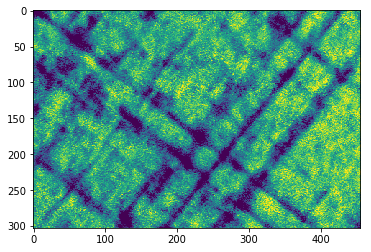

In [18]:
## plotting an example image
%matplotlib inline
ax = plt.imshow(np.flipud(amp1[2].T))
ax.set_clim(-2,2)
#plt.savefig('C:/Users/Josh_/Downloads/As_grown/onecomp', format='png', dpi=1000)

In [8]:
## Exporting images for movies 
for i in range(5):
    for k in range(len(height)):
        ax =plt.imshow(np.flipud(dat[i][k].T))
        ax.set_clim(-1.5,1.5)
        if i == 0:
            plt.savefig('D:/videos/height' + str(k), format='png', dpi=900)
            
        elif i == 1:
            plt.savefig('D:/videos/amp1' + str(k), format='png', dpi=900)
        
        elif i == 2:
            plt.savefig('D:/videos/amp2' + str(k), format='png', dpi=900)
            
        elif i == 3:
            plt.savefig('D:/videos/phase1' + str(k), format='png', dpi=900)
            
        else:
            plt.savefig('D:/videos/phase2' + str(k), format='png', dpi=900)
        plt.close()

In [ ]:
## Testing various filters
import skimage.filters as filt

image = height

otsu = [filt.threshold_otsu(image[i]) for i in range(len(image))]

mi = [filt.threshold_minimum(image[i]) for i in range(len(image))]

tri = [filt.threshold_triangle(image[i]) for i in range(len(image))]

yen = [filt.threshold_yen(image[i]) for i in range(len(image))]

In [ ]:
## masking the images at a given filter value
binary = [image[i] > yen[1] for i in range(len(amp1))]

In [ ]:
## Exporting the masked images for movie making.
for i in range(len(amp1)):
    ax = plt.imshow(np.flipud(binary[i].T))
    ax.set_clim(-1.5,1.5)
    plt.savefig('C:/Users/Josh_/Downloads/Images/yen' + str(i))

In [ ]:
print(np.amax(amp1[2]))
print(np.amin(amp1[2]))


In [ ]:
## playing with canny edge detectors
from scipy import ndimage as ndi

from skimage import feature

im = np.flipud(img_rescale.T)

# compute the cany filter for two values of sigma
edges1 = feature.canny(im, low_threshold=0.1)
edges2 = feature.canny(im, sigma=5)

#Display results
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3),
                                    sharex=True, sharey=True)

ax1.imshow(im, cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('noisy image', fontsize=20)

ax2.imshow(edges1, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title('Canny filter, $\sigma=1$', fontsize=20)

ax3.imshow(edges2, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title('Canny filter, $\sigma=3$', fontsize=20)

fig.tight_layout()

plt.show()

In [ ]:
from skimage.filters import roberts, sobel, scharr, prewitt

im = img_rescale
edge_roberts = roberts(im)
edge_sobel = sobel(im)
edge_prewitt = prewitt(im)
edge_scharr = scharr(im)

fig, ax = plt.subplots(ncols=4,
                       figsize=(20,20))

ax[0].imshow(edge_roberts, cmap=plt.cm.gray)
ax[0].set_title('Roberts Edge Detection')

ax[1].imshow(edge_sobel, cmap=plt.cm.gray)
ax[1].set_title('Sobel Edge Detection')

ax[2].imshow(edge_prewitt, cmap=plt.cm.gray)
ax[2].set_title('Prewitt Edge Detection')

ax[3].imshow(edge_scharr, cmap=plt.cm.gray)
ax[3].set_title('Scharr Edge Detection')
for a in ax:
    a.axis('off')

plt.show()

In [ ]:
# Applying an edge operator to the entire data set to export to a movie

#for i in range(len(amp1)):
  #  if abs(np.amax(amp1[i])) > abs(np.amin(amp1[i])):
   #     edgy =((amp1[i])/(np.amax(amp1[i])))
 #   else:
      #  edgy = ((ampl[i])/(abs(np.amin(ampl[i]))))

edge_prewitt = prewitt(img_rescale)
ax = plt.imshow(np.flipud(edge_prewitt.T), cmap=plt.cm.gray)
  #  plt.savefig('C:/Users/Josh_/Downloads/Images/sobel' + str(i))


In [ ]:
## Corner testing

from skimage.feature import corner_harris, corner_subpix, corner_peaks

#scaled_im = amp1[3]/(np.amax(amp1[3]))
coords = corner_peaks(corner_harris(img_rescale), min_distance = 1)
#coords_subpix= corner_subpix(scaled_im, coords)

fig, ax = plt.subplots()
ax.imshow(scaled_im, interpolation='nearest')
ax.plot(coords[:, 1], coords[:, 0], '.b', markersize=3)
#ax.plot(coords_subpix[:, 1], coords_subpix[:, 0], '+r', markersize=15)

plt.show()

In [ ]:
## Shape indexing fun with weapons

from skimage.filters import frangi

fig, ax = plt.subplots(ncols=2, figsize=(20,10), subplot_kw={'adjustable': 'box-forced'})

ax[0].imshow(img_rescale, cmap=plt.cm.gray)
ax[0].set_title('Original image')

ax[1].imshow(frangi(scaled_im), cmap=plt.cm.gray)
ax[1].set_title('Frangi filter result')

for a in ax:
    a.axis('off')

plt.tight_layout()

In [ ]:
from skimage.transform import (hough_line, hough_line_peaks,
                              probabilistic_hough_line)

h, theta, d = hough_line(img_rescale)

fig, axes = plt.subplots(1, 3, figsize =(20,10), subplot_kw={'adjustable': 'box-forced'})

ax = axes.ravel()

ax[0].imshow(img_rescale)
ax[0].set_title('Input image')
ax[0].set_axis_off()

ax[1].imshow(np.log(1 + h),
             extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]), d[-1], d[0]],
             cmap=cm.gray)
ax[1].set_title('Hough transform')
ax[1].set_xlabel('Angles (degrees)')
ax[1].set_ylabel('Distance (pixels)')
ax[1].axis('image')

ax[2].imshow(img_rescale, cmap=cm.gray)
for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - img_rescale.shape[1] * np.cos(angle)) / np.sin(angle)
    ax[2].plot((0, img_rescale.shape[1]), (y0, y1), '-r')
ax[2].set_xlim((0, img_rescale.shape[1]))
ax[2].set_ylim((img_rescale.shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title('Detected lines')

plt.tight_layout()
plt.show()

In [ ]:

from skimage.feature import canny
edges = canny(img_rescale, 2, 1, 25)
lines = probabilistic_hough_line(edges, threshold=10, line_length=5,
                                 line_gap=3)

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(amp1[3], cmap=cm.gray)
ax[0].set_title('Input image')

ax[1].imshow(edges, cmap=cm.gray)
ax[1].set_title('Canny edges')

ax[2].imshow(edges * 0)
for line in lines:
    p0, p1 = line
    ax[2].plot((p0[0], p1[0]), (p0[1], p1[1]))
ax[2].set_xlim((0, amp1[3].shape[1]))
ax[2].set_ylim((amp1[3].shape[0], 0))
ax[2].set_title('Probabilistic Hough')

for a in ax:
    a.set_axis_off()
    a.set_adjustable('box-forced')

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib
from skimage import img_as_float
from skimage import exposure



scaled_im = amp1[3]/(np.max(abs(amp1[3])))
                     
def plot_img_and_hist(img, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    img = img
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(img)
    ax_img.set_axis_off()
    ax_img.set_adjustable('box-forced')

    # Display histogram
    ax_hist.hist(img.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(img, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf


# Load an example image
img = amp1[3]

# Contrast stretching
p2, p98 = np.percentile(img, (5, 95))
img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))

# Equalization
img_eq = exposure.equalize_hist(img)

# Adaptive Equalization
#img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)

# Display results
fig = plt.figure(figsize=(25, 15))
axes = np.zeros((2, 4), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 4):
    axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 4):
    axes[1, i] = fig.add_subplot(2, 4, 5+i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Contrast stretching')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Histogram equalization')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_adapteq, axes[:, 3])
ax_img.set_title('Adaptive equalization')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

In [ ]:
np.max(img)

In [ ]:
from skimage.filters import try_all_threshold

img = amp1[3]

# Here, we specify a radius for local thresholding algorithms.
# If it is not specified, only global algorithms are called.
fig, ax = try_all_threshold(img, figsize=(25, 10), verbose=False)
plt.show()

In [ ]:
plt.hist(amp1[3].reshape(-1))

In [ ]:
np.var(amp1[3])